# Rating Distribution Analysis

This notebook analyzes the distribution of ratings across 600 images and 14 different psychological dimensions:
- **Approach**, **Arousal**, **Attention**, **Certainty**, **Commitment**
- **Control**, **Dominance**, **Effort**, **Fairness**, **Identity**
- **Obstruction**, **Safety**, **Upswing**, **Valence**

## Analysis Components:

1. **Descriptive Statistics**: Mean, SD, range for each dimension
2. **Distribution Visualizations**: Histograms showing rating distributions
3. **Boxplots**: Comparative view across all dimensions
4. **Correlation Analysis**: Relationships between dimensions
5. **Variability Analysis**: Between-image vs within-image variance (rater agreement)
6. **Extreme Images**: Highest and lowest rated images per dimension
7. **Distribution Shape**: Skewness and kurtosis analysis

## Output Files:
- `distribution_histograms.png`: Individual histograms for each dimension
- `boxplot_all_dimensions.png`: Comparative boxplot across dimensions
- `correlation_heatmap.png`: Correlation matrix visualization
- `variability_analysis.png`: Between vs within-image variance analysis
- `dimension_statistics.csv`: Summary statistics table
- `variability_analysis.csv`: Variance analysis table
- `distribution_shape.csv`: Skewness and kurtosis data
- `correlation_matrix.csv`: Full correlation matrix

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# Load the ratings data
ratings_file = '/home/rothermm/new_assessor/ratings/per_image_Slider_mean_sd_from_wide.csv'
images_dir = Path('/home/rothermm/new_assessor/images')

# Read the file and fix the header
with open(ratings_file, 'r') as f:
    lines = f.readlines()

# Fix the header line by removing extra quotes
header = lines[0].strip().replace('""', '"').replace('"', '')
lines[0] = header + '\n'

# Write to a temporary fixed file
import io
fixed_csv = io.StringIO(''.join(lines))
df = pd.read_csv(fixed_csv)

print("Dataset Overview:")
print(f"Total number of images: {len(df)}")
print(f"\nColumns in the dataset:")
print(df.columns.tolist())
print(f"\nDataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset Overview:
Total number of images: 600

Columns in the dataset:
['image', 'Approach_mean', 'Approach_sd', 'Arousal_mean', 'Arousal_sd', 'Attention_mean', 'Attention_sd', 'Certainty_mean', 'Certainty_sd', 'Commitment_mean', 'Commitment_sd', 'Control_mean', 'Control_sd', 'Dominance_mean', 'Dominance_sd', 'Effort_mean', 'Effort_sd', 'Fairness_mean', 'Fairness_sd', 'Identity_mean', 'Identity_sd', 'Obstruction_mean', 'Obstruction_sd', 'Safety_mean', 'Safety_sd', 'Upswing_mean', 'Upswing_sd', 'Valence_mean', 'Valence_sd']

Dataset shape: (600, 29)

First few rows:


,image,Approach_mean,Approach_sd,Arousal_mean,Arousal_sd,Attention_mean,Attention_sd,Certainty_mean,Certainty_sd,Commitment_mean,...,Identity_mean,Identity_sd,Obstruction_mean,Obstruction_sd,Safety_mean,Safety_sd,Upswing_mean,Upswing_sd,Valence_mean,Valence_sd
0,stimuli/image_001.jpg,6.972545,2.793008,6.067039,3.117486,5.735293,1.423724,4.872414,1.375972,5.713307,...,5.318039,2.482113,5.008424,2.283496,5.528406,2.362231,6.112111,2.527102,6.241939,2.501073
1,stimuli/image_002.jpg,3.956420,2.961351,4.869697,2.314303,4.687141,1.863974,5.037002,0.929088,5.978889,...,4.839077,2.709539,4.053783,1.964866,5.026992,2.605196,4.725944,1.885056,5.456164,2.226132
2,stimuli/image_003.jpg,4.655883,3.241195,6.518649,2.136371,5.477852,1.201297,5.317649,1.964845,5.900585,...,4.388553,1.660209,4.574287,2.538875,3.281171,1.576192,5.214666,2.937079,5.338142,2.999204
3,stimuli/image_004.jpg,6.370493,2.703260,5.899554,2.155649,4.745294,2.707970,6.268013,1.805574,3.291260,...,4.212464,1.750084,2.967946,1.611482,4.995967,3.012077,5.097378,1.964966,5.070997,2.723422
4,stimuli/image_005.jpg,6.337955,1.518080,4.989059,2.165358,5.582712,1.533582,5.477861,2.717217,5.802819,...,6.730818,1.486454,4.781764,0.818418,5.703213,0.991430,5.737970,1.007000,6.519157,1.548066


In [8]:
# Extract dimension names (those ending with '_mean')
dimension_cols = [col for col in df.columns if col.endswith('_mean')]
dimensions = [col.replace('_mean', '') for col in dimension_cols]

print(f"Rating Dimensions ({len(dimensions)}):")
for i, dim in enumerate(dimensions, 1):
    print(f"{i}. {dim}")

# Basic statistics for each dimension
print("\n" + "="*80)
print("DESCRIPTIVE STATISTICS FOR EACH DIMENSION")
print("="*80)

stats_summary = []
for dim in dimensions:
    mean_col = f"{dim}_mean"
    sd_col = f"{dim}_sd"
    
    stats = {
        'Dimension': dim,
        'Overall_Mean': df[mean_col].mean(),
        'Overall_SD': df[mean_col].std(),
        'Min': df[mean_col].min(),
        'Max': df[mean_col].max(),
        'Range': df[mean_col].max() - df[mean_col].min(),
        'Avg_Within_Image_SD': df[sd_col].mean()
    }
    stats_summary.append(stats)

stats_df = pd.DataFrame(stats_summary)
stats_df = stats_df.round(3)
print(stats_df.to_string(index=False))

Rating Dimensions (14):
1. Approach
2. Arousal
3. Attention
4. Certainty
5. Commitment
6. Control
7. Dominance
8. Effort
9. Fairness
10. Identity
11. Obstruction
12. Safety
13. Upswing
14. Valence

DESCRIPTIVE STATISTICS FOR EACH DIMENSION
  Dimension  Overall_Mean  Overall_SD   Min   Max  Range  Avg_Within_Image_SD
   Approach         4.692       1.312 1.062 8.204  7.141                1.686
    Arousal         4.823       1.099 1.076 7.893  6.817                1.702
  Attention         4.822       1.059 1.137 7.913  6.776                1.705
  Certainty         4.769       1.106 1.115 7.751  6.636                1.642
 Commitment         4.701       1.238 1.079 7.757  6.678                1.614
    Control         4.858       1.135 1.058 7.745  6.686                1.742
  Dominance         4.385       1.061 1.054 7.092  6.038                1.317
     Effort         4.220       0.930 1.062 6.415  5.353                1.406
   Fairness         4.590       1.045 1.084 7.738  6.654  

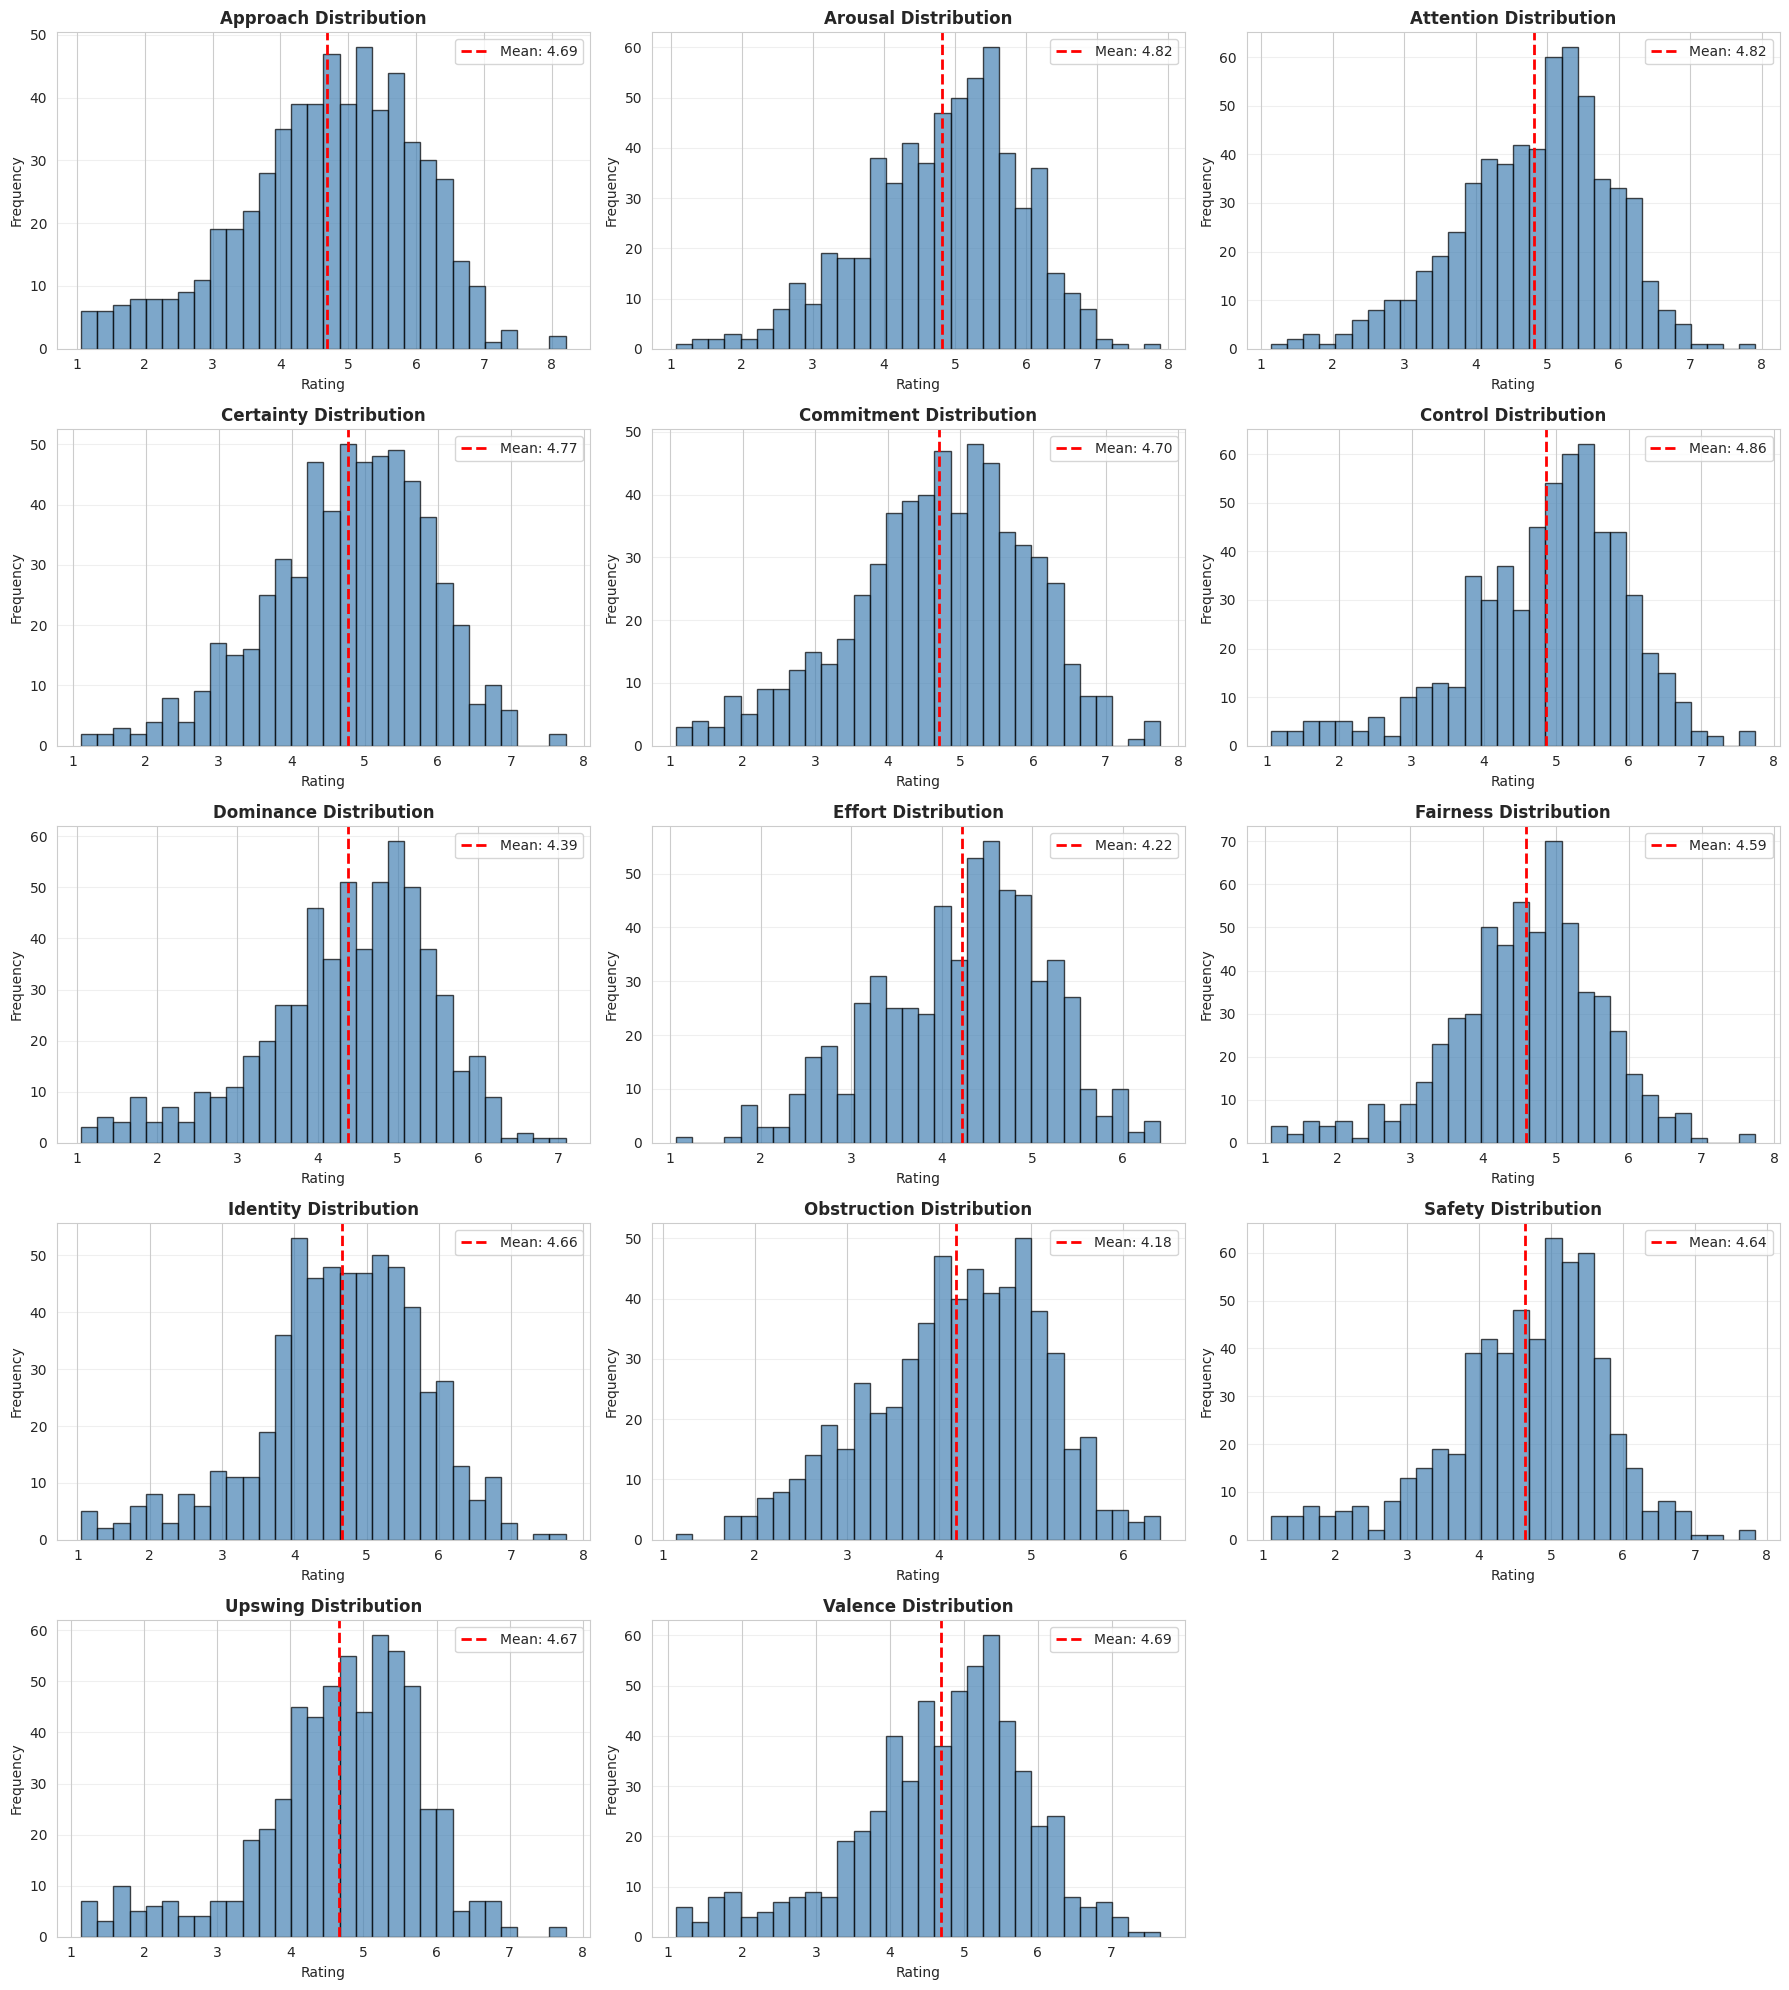

Saved: distribution_histograms.png


In [9]:
# Visualize distributions for all dimensions
n_dims = len(dimensions)
n_cols = 3
n_rows = int(np.ceil(n_dims / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, dim in enumerate(dimensions):
    mean_col = f"{dim}_mean"
    ax = axes[idx]
    
    # Histogram with KDE
    ax.hist(df[mean_col], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    ax.set_xlabel('Rating', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title(f'{dim} Distribution', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # Add mean line
    mean_val = df[mean_col].mean()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.legend()

# Hide empty subplots
for idx in range(n_dims, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('/home/rothermm/new_assessor/distribution_histograms.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: distribution_histograms.png")

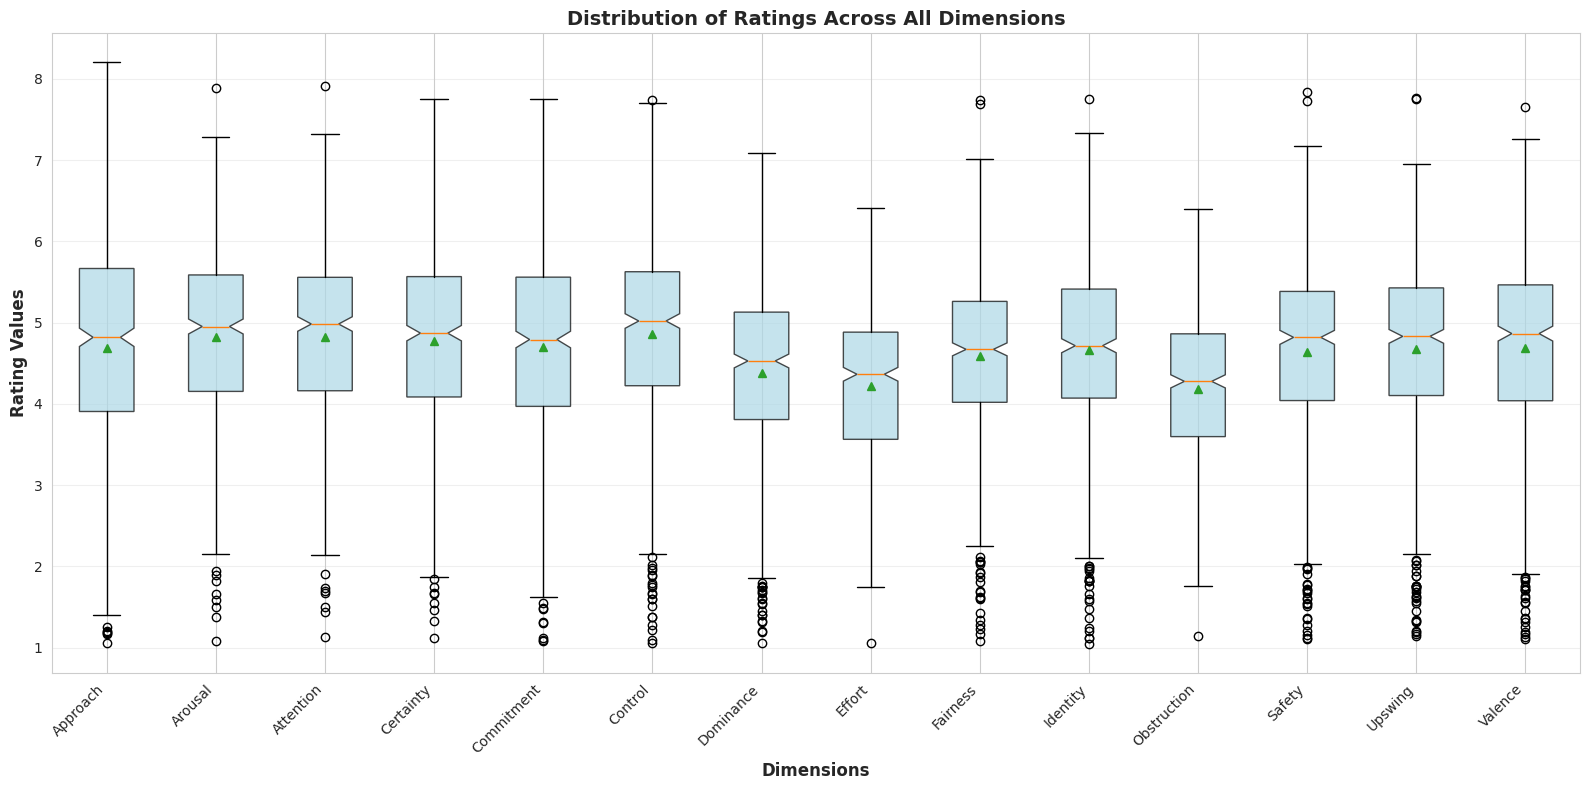

Saved: boxplot_all_dimensions.png


In [10]:
# Box plots for all dimensions
fig, ax = plt.subplots(figsize=(16, 8))

# Prepare data for boxplot
mean_data = [df[f"{dim}_mean"].values for dim in dimensions]

bp = ax.boxplot(mean_data, labels=dimensions, patch_artist=True, 
                notch=True, showmeans=True)

# Color the boxes
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)

ax.set_xlabel('Dimensions', fontsize=12, fontweight='bold')
ax.set_ylabel('Rating Values', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Ratings Across All Dimensions', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/home/rothermm/new_assessor/boxplot_all_dimensions.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: boxplot_all_dimensions.png")

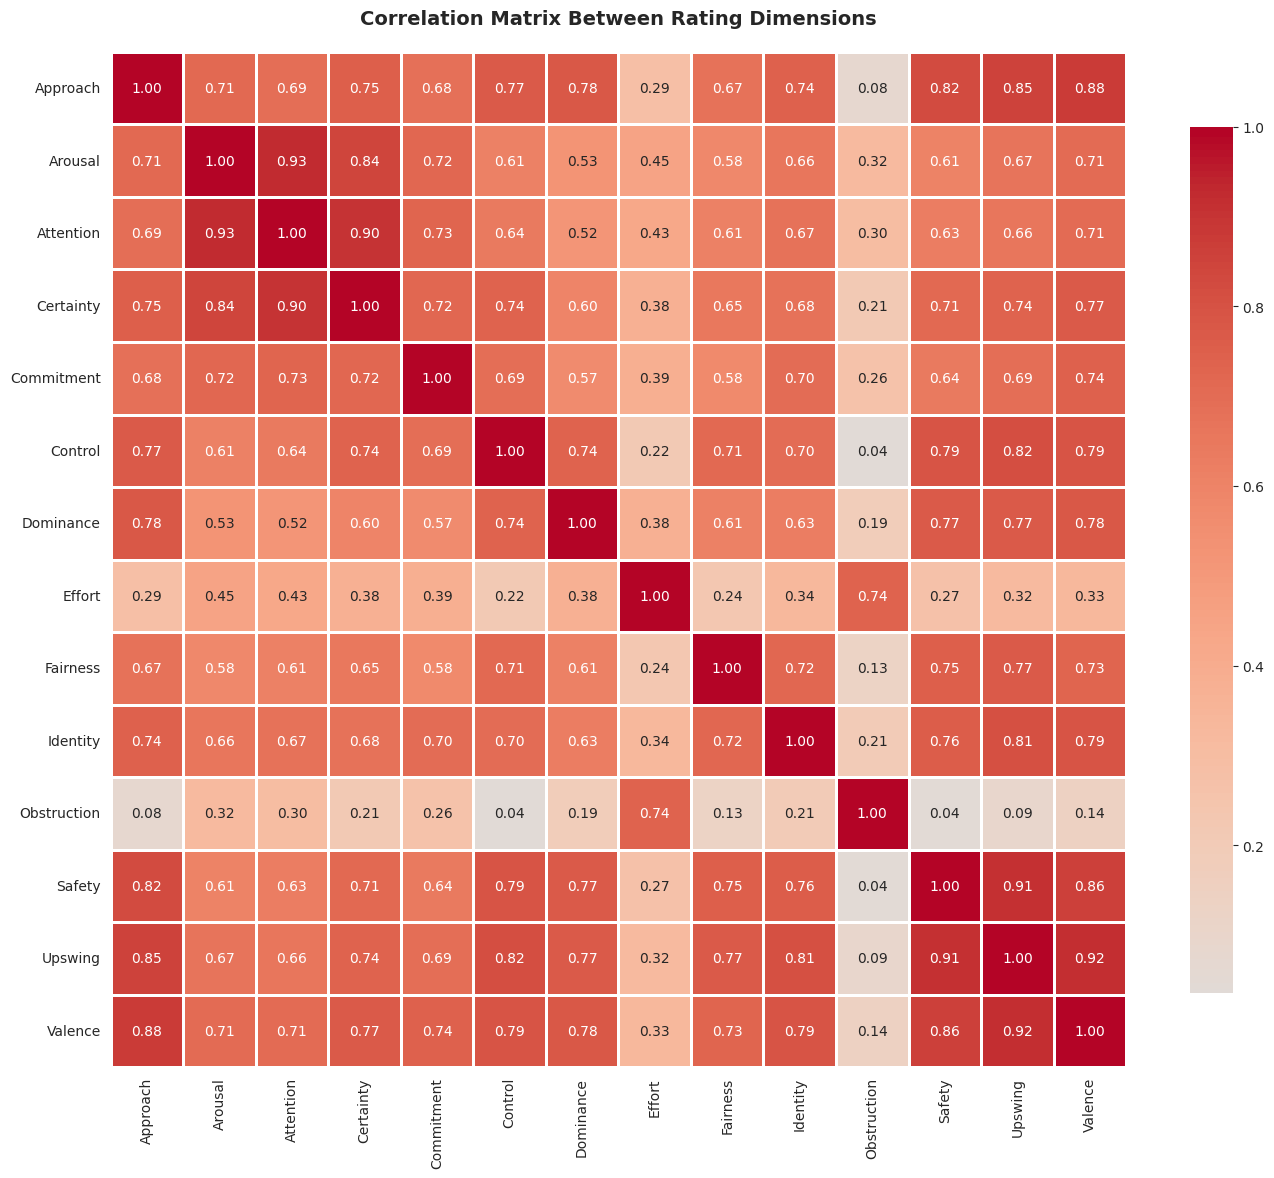

Saved: correlation_heatmap.png


In [11]:
# Correlation heatmap between dimensions
mean_cols = [f"{dim}_mean" for dim in dimensions]
correlation_matrix = df[mean_cols].corr()

# Rename columns for better readability
correlation_matrix.columns = dimensions
correlation_matrix.index = dimensions

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Between Rating Dimensions', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('/home/rothermm/new_assessor/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: correlation_heatmap.png")


VARIABILITY ANALYSIS: Between-Image vs Within-Image Variance
Higher ratio means more agreement among raters (less within-image variability)

  Dimension  Between_Image_Var  Within_Image_Var  Ratio_Between/Within
    Valence           1.410206          2.892842              0.487481
  Dominance           1.125081          2.369686              0.474780
   Approach           1.721931          3.812598              0.451642
     Safety           1.273085          2.826515              0.450408
    Upswing           1.259318          2.810237              0.448118
 Commitment           1.533744          3.679830              0.416797
   Identity           1.253124          3.174664              0.394726
   Fairness           1.091313          2.953456              0.369504
  Certainty           1.223095          3.756191              0.325621
    Control           1.287252          4.071112              0.316192
     Effort           0.864863          2.843921              0.304109
    Ar

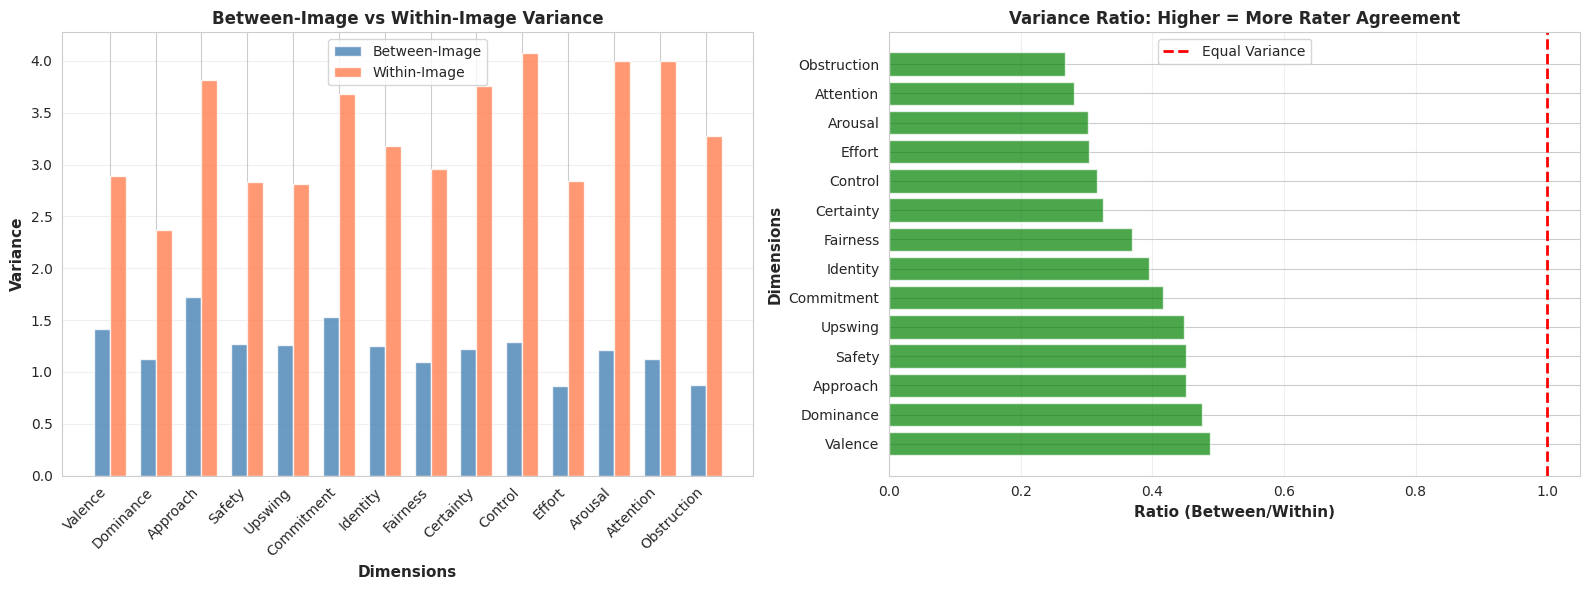


Saved: variability_analysis.png


In [12]:
# Analyze variability - compare between-image variance vs within-image variance
variability_analysis = []

for dim in dimensions:
    mean_col = f"{dim}_mean"
    sd_col = f"{dim}_sd"
    
    between_image_variance = df[mean_col].var()  # Variance across images
    avg_within_image_variance = (df[sd_col] ** 2).mean()  # Average variance within images
    
    variability_analysis.append({
        'Dimension': dim,
        'Between_Image_Var': between_image_variance,
        'Within_Image_Var': avg_within_image_variance,
        'Ratio_Between/Within': between_image_variance / avg_within_image_variance if avg_within_image_variance > 0 else np.nan
    })

var_df = pd.DataFrame(variability_analysis)
var_df = var_df.sort_values('Ratio_Between/Within', ascending=False)

print("\n" + "="*80)
print("VARIABILITY ANALYSIS: Between-Image vs Within-Image Variance")
print("="*80)
print("Higher ratio means more agreement among raters (less within-image variability)")
print("\n" + var_df.to_string(index=False))

# Visualize variability
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Between vs Within variance
x = np.arange(len(dimensions))
width = 0.35
ax1.bar(x - width/2, var_df['Between_Image_Var'], width, label='Between-Image', alpha=0.8, color='steelblue')
ax1.bar(x + width/2, var_df['Within_Image_Var'], width, label='Within-Image', alpha=0.8, color='coral')
ax1.set_xlabel('Dimensions', fontsize=11, fontweight='bold')
ax1.set_ylabel('Variance', fontsize=11, fontweight='bold')
ax1.set_title('Between-Image vs Within-Image Variance', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(var_df['Dimension'], rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Ratio
ax2.barh(var_df['Dimension'], var_df['Ratio_Between/Within'], color='green', alpha=0.7)
ax2.set_xlabel('Ratio (Between/Within)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Dimensions', fontsize=11, fontweight='bold')
ax2.set_title('Variance Ratio: Higher = More Rater Agreement', fontsize=12, fontweight='bold')
ax2.axvline(1, color='red', linestyle='--', linewidth=2, label='Equal Variance')
ax2.legend()
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('/home/rothermm/new_assessor/variability_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("\nSaved: variability_analysis.png")

In [13]:
# Find extreme images for each dimension
print("\n" + "="*80)
print("EXTREME IMAGES FOR EACH DIMENSION")
print("="*80)

extreme_images = {}

for dim in dimensions:
    mean_col = f"{dim}_mean"
    
    # Top 5 highest rated
    top_5 = df.nlargest(5, mean_col)[['image', mean_col]]
    
    # Bottom 5 lowest rated
    bottom_5 = df.nsmallest(5, mean_col)[['image', mean_col]]
    
    extreme_images[dim] = {
        'highest': top_5,
        'lowest': bottom_5
    }
    
    print(f"\n{dim}:")
    print(f"  Highest 5 images:")
    for idx, row in top_5.iterrows():
        img_name = Path(row['image']).name
        print(f"    {img_name}: {row[mean_col]:.3f}")
    
    print(f"  Lowest 5 images:")
    for idx, row in bottom_5.iterrows():
        img_name = Path(row['image']).name
        print(f"    {img_name}: {row[mean_col]:.3f}")


EXTREME IMAGES FOR EACH DIMENSION

Approach:
  Highest 5 images:
    image_017.jpg: 8.204
    image_571.jpg: 7.986
    image_393.jpg: 7.315
    image_370.jpg: 7.296
    image_026.jpg: 7.293
  Lowest 5 images:
    image_308.jpg: 1.062
    image_364.jpg: 1.165
    image_346.jpg: 1.186
    image_440.jpg: 1.192
    image_363.jpg: 1.202

Arousal:
  Highest 5 images:
    image_571.jpg: 7.893
    image_370.jpg: 7.283
    image_017.jpg: 7.170
    image_061.jpg: 7.038
    image_350.jpg: 6.963
  Lowest 5 images:
    image_308.jpg: 1.076
    image_383.jpg: 1.378
    image_335.jpg: 1.495
    image_451.jpg: 1.592
    image_317.jpg: 1.655

Attention:
  Highest 5 images:
    image_571.jpg: 7.913
    image_017.jpg: 7.325
    image_370.jpg: 7.168
    image_061.jpg: 6.989
    image_020.jpg: 6.953
  Lowest 5 images:
    image_308.jpg: 1.137
    image_363.jpg: 1.442
    image_335.jpg: 1.498
    image_451.jpg: 1.669
    image_305.jpg: 1.701

Certainty:
  Highest 5 images:
    image_571.jpg: 7.751
    imag

In [14]:
# Distribution shape analysis (skewness and kurtosis)
from scipy import stats

shape_analysis = []

for dim in dimensions:
    mean_col = f"{dim}_mean"
    data = df[mean_col]
    
    skew = stats.skew(data)
    kurt = stats.kurtosis(data)
    
    # Interpret skewness
    if skew < -0.5:
        skew_interp = "Left-skewed"
    elif skew > 0.5:
        skew_interp = "Right-skewed"
    else:
        skew_interp = "Symmetric"
    
    # Interpret kurtosis
    if kurt > 0.5:
        kurt_interp = "Heavy-tailed"
    elif kurt < -0.5:
        kurt_interp = "Light-tailed"
    else:
        kurt_interp = "Normal-like"
    
    shape_analysis.append({
        'Dimension': dim,
        'Skewness': skew,
        'Skew_Interpretation': skew_interp,
        'Kurtosis': kurt,
        'Kurt_Interpretation': kurt_interp
    })

shape_df = pd.DataFrame(shape_analysis)

print("\n" + "="*80)
print("DISTRIBUTION SHAPE ANALYSIS")
print("="*80)
print(shape_df.to_string(index=False))


DISTRIBUTION SHAPE ANALYSIS
  Dimension  Skewness Skew_Interpretation  Kurtosis Kurt_Interpretation
   Approach -0.500791         Left-skewed -0.049309         Normal-like
    Arousal -0.473178           Symmetric  0.095576         Normal-like
  Attention -0.513872         Left-skewed  0.241483         Normal-like
  Certainty -0.472654           Symmetric  0.149547         Normal-like
 Commitment -0.433134           Symmetric  0.010427         Normal-like
    Control -0.762807         Left-skewed  0.862243        Heavy-tailed
  Dominance -0.721709         Left-skewed  0.478674         Normal-like
     Effort -0.392966           Symmetric -0.196003         Normal-like
   Fairness -0.537631         Left-skewed  0.870940        Heavy-tailed
   Identity -0.597309         Left-skewed  0.651454        Heavy-tailed
Obstruction -0.398293           Symmetric -0.236432         Normal-like
     Safety -0.710666         Left-skewed  0.777485        Heavy-tailed
    Upswing -0.838832         Left-

In [15]:
# Create a comprehensive summary report
summary_report = {
    'Total Images': len(df),
    'Number of Dimensions': len(dimensions),
    'Dimensions': ', '.join(dimensions),
    'Most Variable Dimension (Between Images)': stats_df.loc[stats_df['Overall_SD'].idxmax(), 'Dimension'],
    'Least Variable Dimension (Between Images)': stats_df.loc[stats_df['Overall_SD'].idxmin(), 'Dimension'],
    'Highest Mean Rating Dimension': stats_df.loc[stats_df['Overall_Mean'].idxmax(), 'Dimension'],
    'Lowest Mean Rating Dimension': stats_df.loc[stats_df['Overall_Mean'].idxmin(), 'Dimension'],
    'Best Rater Agreement Dimension': var_df.iloc[0]['Dimension'],
    'Worst Rater Agreement Dimension': var_df.iloc[-1]['Dimension']
}

print("\n" + "="*80)
print("COMPREHENSIVE SUMMARY REPORT")
print("="*80)
for key, value in summary_report.items():
    print(f"{key}: {value}")

# Save all statistics to CSV files
stats_df.to_csv('/home/rothermm/new_assessor/dimension_statistics.csv', index=False)
var_df.to_csv('/home/rothermm/new_assessor/variability_analysis.csv', index=False)
shape_df.to_csv('/home/rothermm/new_assessor/distribution_shape.csv', index=False)
correlation_matrix.to_csv('/home/rothermm/new_assessor/correlation_matrix.csv')

print("\n" + "="*80)
print("SAVED FILES")
print("="*80)
print("✓ dimension_statistics.csv")
print("✓ variability_analysis.csv")
print("✓ distribution_shape.csv")
print("✓ correlation_matrix.csv")
print("✓ distribution_histograms.png")
print("✓ boxplot_all_dimensions.png")
print("✓ correlation_heatmap.png")
print("✓ variability_analysis.png")
print("\nAnalysis complete!")


COMPREHENSIVE SUMMARY REPORT
Total Images: 600
Number of Dimensions: 14
Dimensions: Approach, Arousal, Attention, Certainty, Commitment, Control, Dominance, Effort, Fairness, Identity, Obstruction, Safety, Upswing, Valence
Most Variable Dimension (Between Images): Approach
Least Variable Dimension (Between Images): Effort
Highest Mean Rating Dimension: Control
Lowest Mean Rating Dimension: Obstruction
Best Rater Agreement Dimension: Valence
Worst Rater Agreement Dimension: Obstruction

SAVED FILES
✓ dimension_statistics.csv
✓ variability_analysis.csv
✓ distribution_shape.csv
✓ correlation_matrix.csv
✓ distribution_histograms.png
✓ boxplot_all_dimensions.png
✓ correlation_heatmap.png
✓ variability_analysis.png

Analysis complete!
